The temporal structure of time series data adds an order to the observations, which means that important assumptions about the consistency of the observations must be handled specifically.

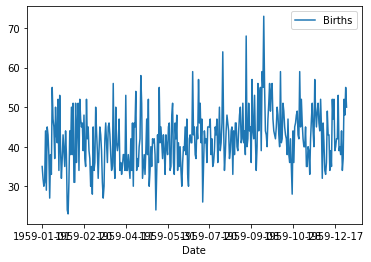

In [1]:
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('data/daily-total-female-births.txt', header = 0, index_col=0)

series.plot()
pyplot.show()


## Non-Stationary time series
 - seasonal effects
 - trends
 - anything else dependent on time index

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends/seasonal effects

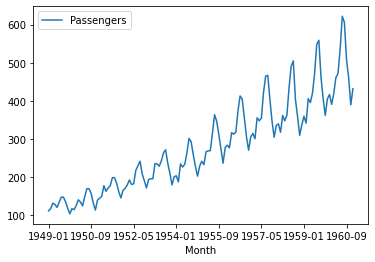

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data/international-airline-passengers.csv', header=0, index_col=0)
series.plot()
pyplot.show()

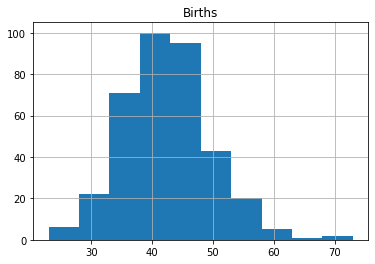

In [5]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data/daily-total-female-births.txt')
series.hist()
pyplot.show()

In [13]:
X = series.values
split = round(len(X)/2)

In [14]:
X1, X2 = X[0:split],X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (str(mean1), str(mean2)))
print('variance1=%f, variance2=%f' % (var1, var2))

TypeError: can only concatenate str (not "int") to str

In [19]:
from pandas import read_csv
series = read_csv('data/international-airline-passengers.csv', header=0,index_col=0)
X = series.values
split = len(X) / 2
X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()

var1, var2 = X1.var(), X2.var()

print('mean1=%f,mean2=%f' % (mean1,mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

TypeError: slice indices must be integers or None or have an __index__ method

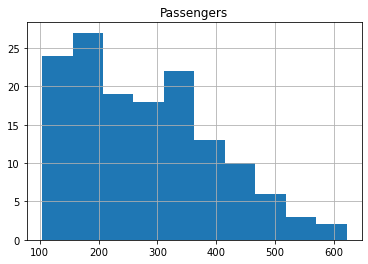

In [22]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data/international-airline-passengers.csv', header=0, index_col=0)
series.hist()
pyplot.show()

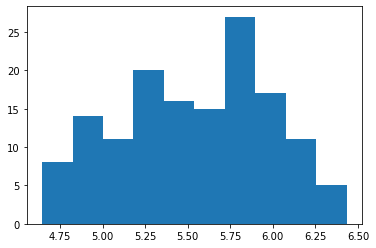

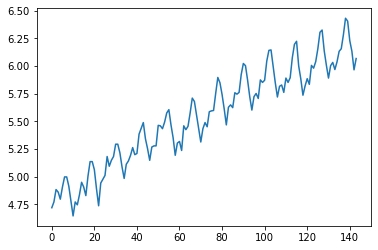

In [24]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
series = read_csv('data/international-airline-passengers.csv', header=0, index_col=0)
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [25]:
X = series.values
X = log(X)

split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()

var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


## Augmented Dickey-Fuller Test

A type of statistical test called a unit root test.  It determines how strongly a time series is defined by a trend.

 - **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
 - **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [28]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('data/daily-total-female-births.txt', header=0, index_col=0, squeeze=True)

C:\Users\thowe\AppData\Local\Temp\ipykernel_27412\236951581.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('data/daily-total-female-births.txt', header=0, index_col=0, squeeze=True)


In [29]:
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [31]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('data/international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


C:\Users\thowe\AppData\Local\Temp\ipykernel_27412\2671408373.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('data/international-airline-passengers.csv', header=0, index_col=0, squeeze=True)


In [33]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = read_csv('data/international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


C:\Users\thowe\AppData\Local\Temp\ipykernel_27412\1335132763.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('data/international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
